In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import missingno as msno
# Library for performing k-NN and MICE imputations 

from sklearn.impute import KNNImputer
import fancyimpute
# Library to perform Expectation-Maximization (EM) imputation
import impyute as impy
# To perform mean imputation
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
#To perform kFold Cross Validation
from sklearn.model_selection import KFold

In [212]:
df = pd.read_csv('mammographic_masses.data.txt', na_values= '?', names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])
df.head()

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [213]:
df.dtypes

BI-RADS     float64
age         float64
shape       float64
margin      float64
density     float64
severity      int64
dtype: object

In [214]:
df.columns

Index(['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'], dtype='object')

In [215]:
df.describe()

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [216]:
df.isnull().sum()

BI-RADS      2
age          5
shape       31
margin      48
density     76
severity     0
dtype: int64

In [217]:
df.loc[(df['age'].isnull()) |
      (df['shape'].isnull()) |
      (df['margin'].isnull())]

,BI-RADS,age,shape,margin,density,severity
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
9,5.0,60.0,NaN,5.0,1.0,1
12,4.0,64.0,1.0,NaN,3.0,0
...,...,...,...,...,...,...
778,4.0,60.0,NaN,4.0,3.0,0
819,4.0,35.0,3.0,NaN,2.0,0
824,6.0,40.0,NaN,3.0,4.0,1
884,5.0,NaN,4.0,4.0,3.0,1


There are only few missing values. Instead of dropping them out, we shall try imputing them with 4 known major imputation techniques

In [218]:
df.columns

Index(['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'], dtype='object')

In [229]:
class Data:
    """ All basic operations performed on data are stored in this class"""
    
    def __init__(self, dataframe):
        self.dataframe = dataframe
    
    def drop_missing(self, verbose=False):
        """ Drops missing values and displays the affect of doing so"""
        cleaned = [df.dropna(axis=0, how='any')]
        if verbose:
            print( 'Original length: ', len(self.dataframe), 'Cleaned length :', len(cleaned), '\tMissing data: ', len(self.dataframe) - len(cleaned))
        else:
            return cleaned
    
    def generate_sparsity_matrix(self):
        """ Generates sparsity matrix for visulization of missing areas in attributes"""
        missing_values = self.dataframe.isnull()
        msno.matrix(missing_values)
    
    def generate_heatmap(self):
        """ Generates heatmaps for visualiztion of correlation between variables"""
        missing_values = [self.dataframe.columns[self.dataframe.isnull().any()].tolist()]
        msno.heatmap(self.dataframe[missing_values], figsize=(20,20))
    
    def do_mean_imputation(self):
        """ Performs mean imputation on dataframe passed as argument and returns a dataframe of same length as of the argument"""
        imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        imputed_dataframe = (imputer.fit_transform(self.dataframe))
        print(type(imputed_dataframe))
        #imputed_dataframe.columns = self.dataframe.columns
        #return imputed_dataframe
    
    def do_knn_imputation(self):
        """ Performs KNN imputation on dataframe passed as argument and returns a dataframe of same length as of the argument"""
        imputer = KNNImputer(n_neighbors=5).fit_transform(self.dataframe)
        df = pd.DataFrame(data = imputer)
        return df
    
def set_header(df):
    """ Sets column names for all column features and label"""
    df.columns = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity']

In [230]:
Data = Data(df)

In [232]:
df_new = Data.do_knn_imputation()
set_header(df_new)
masses_data.describe()

,0,1,2,3,4,5
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,4.347763,55.551717,2.726119,2.765245,2.911134,0.463059
std,1.781215,14.474158,1.230309,1.550510,0.367382,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [233]:
df_new.isnull().sum()

BI-RADS     0
age         0
shape       0
margin      0
density     0
severity    0
dtype: int64

In [244]:
X = df_new[['age', 'shape', 'margin', 'density']].values


y = df_new['severity'].values

X_names = ['age', 'shape', 'margin', 'density']
X

array([[67. ,  3. ,  5. ,  3. ],
       [43. ,  1. ,  1. ,  2.6],
       [58. ,  4. ,  5. ,  3. ],
       ...,
       [64. ,  4. ,  5. ,  3. ],
       [66. ,  4. ,  5. ,  3. ],
       [62. ,  3. ,  3. ,  3. ]])

In [245]:
import numpy
from sklearn.model_selection import train_test_split

numpy.random.seed(1234)

(X_train, X_test, y_train, y_test) = train_test_split(X, y, train_size=0.75, random_state=1)

In [246]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
print(len(X_train_scaled))
print(len(X_test_scaled))

720
241


In [247]:
from sklearn.tree import DecisionTreeClassifier

clf= DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=1)

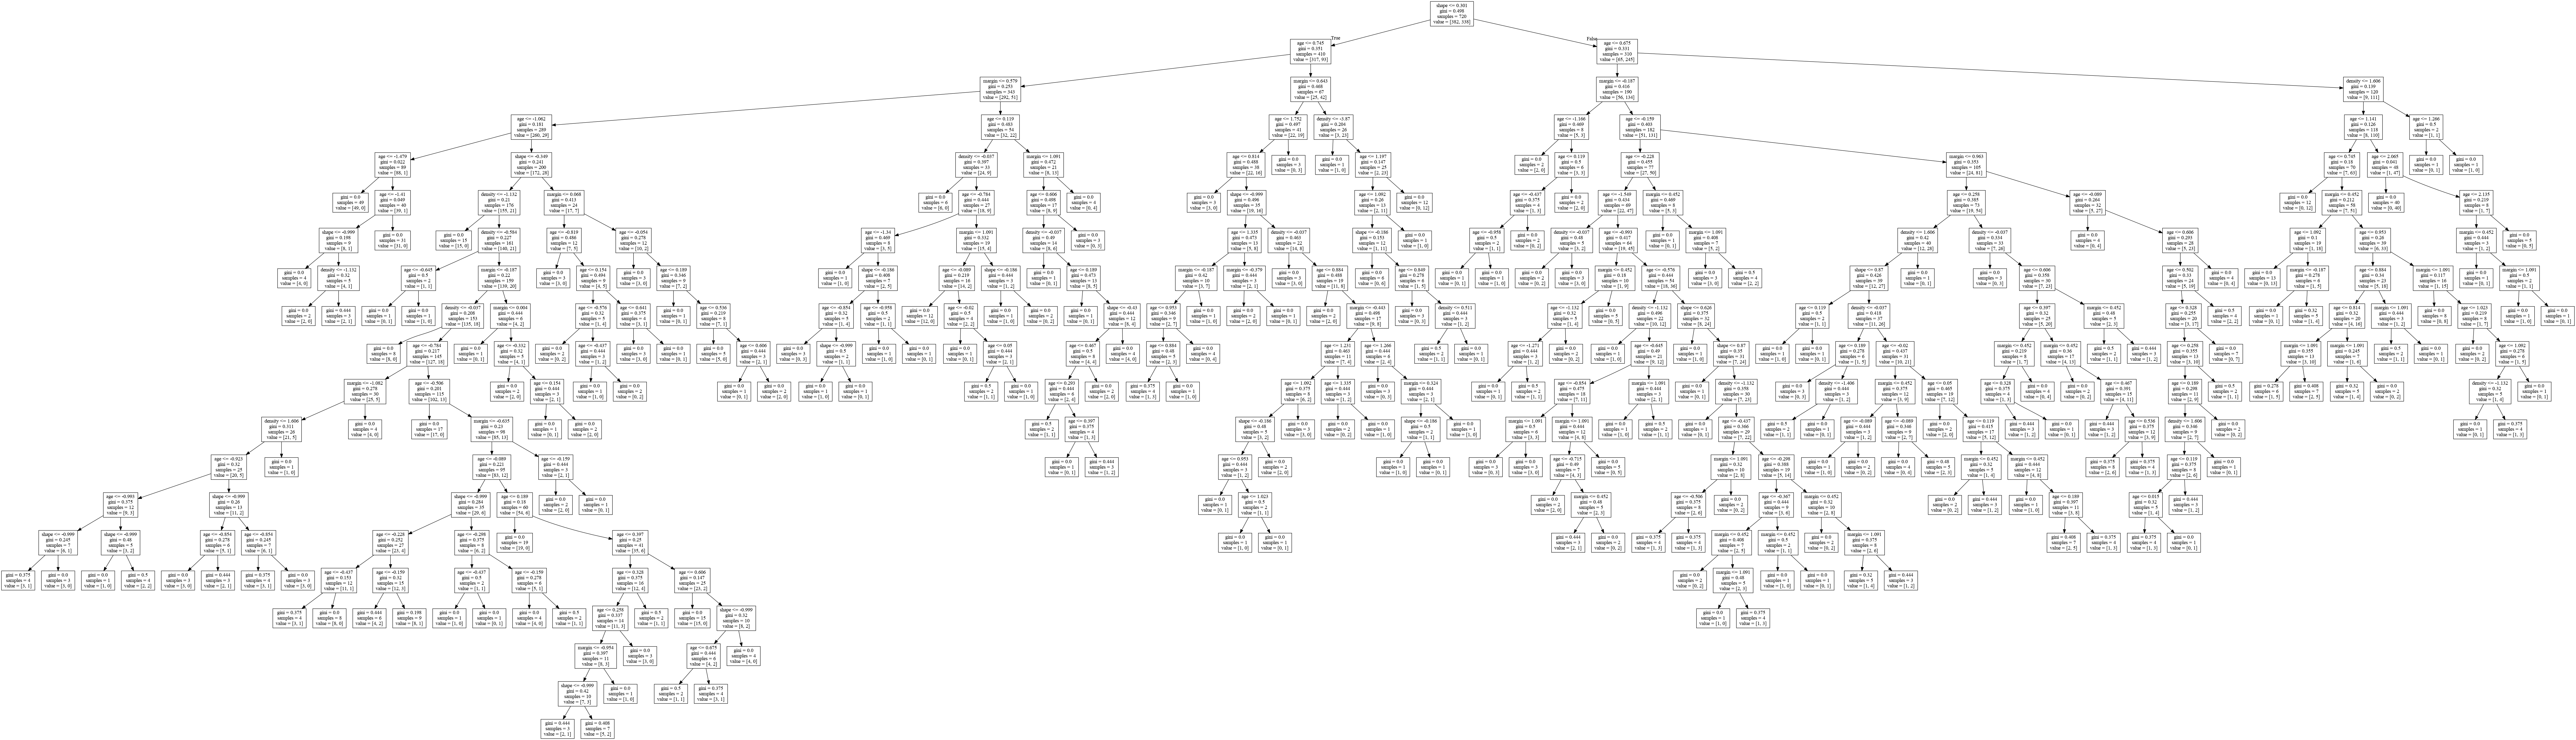

In [250]:
# Display the tree
from IPython.display import Image  
from io import StringIO
from sklearn import tree
from pydotplus import graph_from_dot_data 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=X_names)  
graph = graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [251]:
clf.score(X_test, y_test)

0.5518672199170125

In [255]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=10)

cv_scores.mean()

0.7430555555555556

In [256]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=1)
cv_scores = cross_val_score(clf, X_train, y_train, cv=10)

cv_scores.mean()

0.7583333333333334

In [257]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C)

In [258]:
cv_scores = cross_val_score(svc, X_train, y_train, cv=10)

cv_scores.mean()

0.7916666666666666

In [259]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(clf, X_train, y_train,  cv=10)

cv_scores.mean()

0.7777777777777778

In [260]:
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=10)
    print (n, cv_scores.mean())

1 0.7277777777777779
2 0.6902777777777778
3 0.7583333333333333
4 0.7319444444444444
5 0.7749999999999999
6 0.7805555555555556
7 0.7805555555555556
8 0.7750000000000001
9 0.7763888888888889
10 0.7777777777777778
11 0.7763888888888889
12 0.773611111111111
13 0.7791666666666667
14 0.7763888888888888
15 0.7763888888888889
16 0.7805555555555556
17 0.7722222222222224
18 0.7694444444444444
19 0.7722222222222224
20 0.7680555555555555
21 0.7680555555555556
22 0.7708333333333333
23 0.775
24 0.7722222222222223
25 0.7694444444444445
26 0.7680555555555556
27 0.7666666666666667
28 0.7708333333333333
29 0.7694444444444444
30 0.7694444444444445
31 0.7749999999999998
32 0.775
33 0.7763888888888889
34 0.7777777777777779
35 0.7777777777777779
36 0.7736111111111111
37 0.7777777777777779
38 0.7708333333333333
39 0.7791666666666667
40 0.7708333333333334
41 0.773611111111111
42 0.7680555555555555
43 0.7708333333333334
44 0.7694444444444445
45 0.7777777777777779
46 0.7708333333333333
47 0.775
48 0.77083333333

In [263]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)

clf = MultinomialNB()
cv_scores = cross_val_score(clf, X_train, y_train, cv=10)

cv_scores.mean()

0.7416666666666667

In [264]:
C = 1.0
svc = svm.SVC(kernel='rbf', C=C)
cv_scores = cross_val_score(svc, X_train, y_train, cv=10)
cv_scores.mean()

0.773611111111111

In [268]:
C = 1.0
svc = svm.SVC(kernel='sigmoid', C=C)
cv_scores = cross_val_score(svc, X_train, y_train, cv=10)
cv_scores.mean()

0.32083333333333336

In [269]:
C = 1.0
svc = svm.SVC(kernel='poly', C=C)
cv_scores = cross_val_score(svc, X_train, y_train, cv=10)
cv_scores.mean()

0.7805555555555556

In [271]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
cv_scores = cross_val_score(clf,  X_train, y_train, cv=10)
cv_scores.mean()

0.7916666666666667